In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
def rastrigin(n, x):
  f = 10 * n
  for i in x:
    f += i**2 - 10 * np.cos(2 * np.pi * i)
  return f

def rosenbrock(n, x):
  f = 0
  for i in range(n - 1):
    f += (100*((x[i + 1] - x[i]**2)**2) + (1 -x[i])**2)
  return f

def eggholder(x, y):
  return (-(y + 47)*np.sin(np.sqrt(np.abs(x/2 + (y + 47))))
            - x*np.sin(np.sqrt(np.abs(x - (y + 47)))))

def ackley(x, y):
  return (-20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2)))
            - np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20)

In [ ]:
def star(swarm, num_particles, bounds):
  for i in range(0,num_particles):
    swarm[i].update_velocity(pos_best_g)
    swarm[i].update_position(bounds)

def ring(swarm, num_particles, bounds):
  for i in range(0, num_particles):
    if i == num_particles - 1:
      if swarm[i].err_i < swarm[0].err_i:
        best = i
      else: best = 0
      if swarm[i - 1].err_i < swarm[best].err_i:
        best = i - 1
      swarm[i].update_velocity(swarm[best].pos_best_i)
      swarm[i].update_position(bounds)
      break
    if swarm[i].err_i < swarm[i + 1].err_i:
      best = i
    else: best = i + 1
    if swarm[i - 1].err_i < swarm[best].err_i:
      best = i - 1
    swarm[i].update_velocity(swarm[best].pos_best_i)
    swarm[i].update_position(bounds)

In [ ]:
class Particle:
  def __init__(self,x0):
    self.position_i=[]          # particle position
    self.velocity_i=[]          # particle velocity
    self.pos_best_i=[]          # best position individual
    self.err_best_i=-1          # best error individual
    self.err_i=-1  

    for i in range(0,num_dimensions):
      self.velocity_i.append(random.uniform(-1,1))
      self.position_i.append(x0[i])

   # evaluate current fitness
  def evaluate(self,costFunc):
    if costFunc == rastrigin or costFunc == rosenbrock:
      self.err_i=costFunc(len(self.position_i), self.position_i)
    else: 
      self.err_i=costFunc(self.position_i[0], self.position_i[1])

    if self.err_i < self.err_best_i or self.err_best_i==-1:
      self.pos_best_i=self.position_i
      self.err_best_i=self.err_i

  def update_velocity(self,pos_best_g):
    w = 0.7208
    c1 = 1.49618
    c2 = 1.49618

    for i in range(0,num_dimensions):
      r1=random.random()
      r2=random.random()

      vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
      vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
      self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

  # update the particle position based off new velocity updates
  def update_position(self,bounds):
    for i in range(0,num_dimensions):
      self.position_i[i]=self.position_i[i]+self.velocity_i[i]

      # adjust maximum position if necessary
      if self.position_i[i]>bounds[1]:
        self.position_i[i]=bounds[1]

      # adjust minimum position if neseccary
      if self.position_i[i] < bounds[0]:
        self.position_i[i]=bounds[0]

In [ ]:
class PSO():
  def __init__(self,costFunc,topology,bounds,d,num_particles,maxiter):
    global num_dimensions
    num_dimensions = d

    err_best_g = -1
    global pos_best_g
    pos_best_g = []              

    swarm = []
    for i in range(0,num_particles):
      x0 = []
      for j in range(d):
        x0.append(random.uniform(bounds[0], bounds[1]))
      swarm.append(Particle(x0))
      #print(i, swarm[i].position_i)

    if d == 2:
      i=0
      while i < maxiter:
        for j in range(0,num_particles):
          swarm[j].evaluate(costFunc)
      
          if swarm[j].err_i < err_best_g or err_best_g == -1:
            pos_best_g=list(swarm[j].position_i)
            err_best_g=float(swarm[j].err_i)

        topology(swarm, num_particles, bounds)
        i += 1
    else:
      cost = 1000000
      while True:
        for j in range(0,num_particles):
          swarm[j].evaluate(costFunc)
          cost -= 1
          
          if swarm[j].err_i < err_best_g or err_best_g == -1:
            pos_best_g=list(swarm[j].position_i)
            err_best_g=float(swarm[j].err_i)
          if cost == 0: break
        
        if cost != 0: topology(swarm, num_particles, bounds)
        else: break
    # print final results
    #print('FINAL:')
    print(pos_best_g)
    print(err_best_g)

if __name__ == "__PSO__":
  main()

In [ ]:
global num_dimensions
num_dimensions = 2
x = Particle([5, 5])
print(x.evaluate(rastrigin))

None


In [ ]:
#rastrigin_star
random.seed(18520173)
bounds_rastrigin = [-5.12, 5.12]
PSO(rastrigin,star,bounds_rastrigin,d=2,num_particles=32,maxiter=50)

FINAL:
[0.0025439171495129295, -0.004446756496002714]
0.005206550554905931


In [ ]:
#rastrigin_ring
random.seed(18520173)
bounds_rastrigin = [-5.12, 5.12]
PSO(rastrigin,ring,bounds_rastrigin,d=2,num_particles=32,maxiter=50)

In [ ]:
#rosenbrock_star
random.seed(18520173)
bounds_rosenbrock = [-10, 10]
PSO(rosenbrock,star,bounds_rosenbrock,d=2,num_particles=32,maxiter=50)

In [ ]:
#rosenbrock_ring
random.seed(18520173)
bounds_rosenbrock = [-10, 10]
PSO(rosenbrock,ring,bounds_rosenbrock,d=2,num_particles=32,maxiter=50)

In [ ]:
#eggholder_star
random.seed(18520173)
bounds_eggholder=[-512, 512] 
PSO(eggholder,star,bounds_eggholder,d=2,num_particles=32,maxiter=50)

In [ ]:
#eggholder_ring
random.seed(18520173)
bounds_eggholder=[-512, 512] 
PSO(eggholder,ring,bounds_eggholder,d=2,num_particles=32,maxiter=50)

In [ ]:
#ackley_star
random.seed(18520173)
bounds_ackley = [-5, 5]
PSO(ackley,star,bounds_ackley,d=2,num_particles=32,maxiter=50)

In [ ]:
#ackley_ring
random.seed(18520173)
bounds_ackley = [-5, 5]
PSO(ackley,ring,bounds_ackley,d=2,num_particles=32,maxiter=50)

[0.05778733144815772, 0.02119804784368237]
0.2721489822325438


In [ ]:
#rastrigin using star topology and n = 128, 256, 512, 1024, 2048
for i in range(0, 10):
  random.seed(18520173 + i)
  bounds_rastrigin = [-5.12, 5.12]
  print(18520173 + i)
  PSO(rastrigin,star,bounds_rastrigin,d=10,num_particles=2048,maxiter=0)

In [ ]:
#rastrigin using ring topology and n = 128, 256, 512, 1024, 2048
for i in range(0, 10):
  random.seed(18520173 + i)
  bounds_rastrigin = [-5.12, 5.12]
  print(18520173 + i)
  PSO(rastrigin,ring,bounds_rastrigin,d=10,num_particles=2048,maxiter=0)

In [ ]:
#rosenbrock using star topology and n = 128, 256, 512, 1024, 2048
for i in range(0, 10):
  random.seed(18520173 + i)
  bounds_rosenbrock = [-10, 10]
  print(18520173 + i)
  PSO(rosenbrock,star,bounds_rosenbrock,d=10,num_particles=2048,maxiter=0)

In [ ]:
#rosenbrock using ring topology and n = 128, 256, 512, 1024, 2048
for i in range(0, 10):
  random.seed(18520173 + i)
  bounds_rosenbrock = [-10, 10]
  print(18520173 + i)
  PSO(rosenbrock,ring,bounds_rosenbrock,d=10,num_particles=2048,maxiter=0)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D

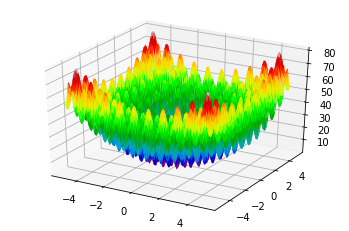

In [ ]:
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
# plt.savefig('rastrigin_graph.png')
plt.show()

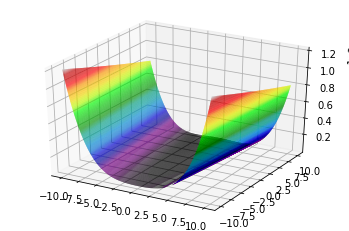

In [ ]:
X, Y = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
Z = 100 * (Y - X ** 2) ** 2 + (1 - X) ** 2

fig = plt.figure() 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
# plt.savefig('rastrigin_graph.png')
plt.show()

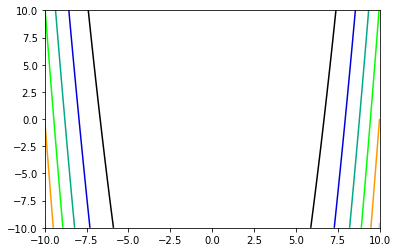

In [ ]:
cs = plt.contour(X, Y, Z, cmap=cm.nipy_spectral, extend='both', antialiased=True)
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

NameError: ignored

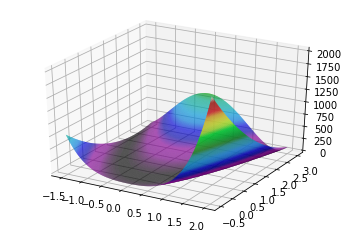

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

fig = plot.figure()
ax = fig.gca(projection='3d')

s = 0.01   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-1.5, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-0.5, 3.+s, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1. - X)**2 + 100*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, antialiased=True)  #Try coolwarm vs jet

plt.show()

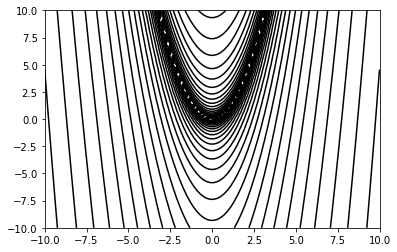

In [ ]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Z = 100 * (Y - X ** 2) ** 2 + (1 - X) ** 2
_, ax = plt.subplots(1, 1)
ax.contour(X, Y, Z, np.logspace(-10, 10, 100), cmap=cm.nipy_spectral)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plt.show()

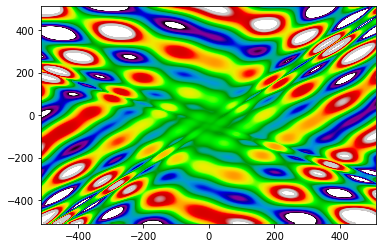

In [ ]:
X, Y = np.meshgrid(np.linspace(-512, 512, 1000), np.linspace(-512, 512, 1000))
Z = (-(Y + 47)*np.sin(np.sqrt(np.abs(X/2 + (Y + 47))))
            - X*np.sin(np.sqrt(np.abs(X - (Y + 47)))))
_, ax = plt.subplots(1, 1)
ax.contour(X, Y, Z, np.linspace(-512, 512, 1000), cmap=cm.nipy_spectral)
ax.set_xlim(-512, 512)
ax.set_ylim(-512, 512)
plt.show()

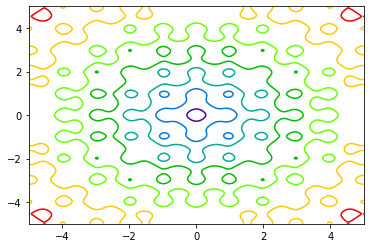

In [ ]:
X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
Z = (-20*np.exp(-0.2*np.sqrt(0.5*(X**2 + Y**2)))
            - np.exp(0.5*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))) + np.e + 20)
_, ax = plt.subplots(1, 1)
ax.contour(X, Y, Z, cmap=cm.nipy_spectral)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

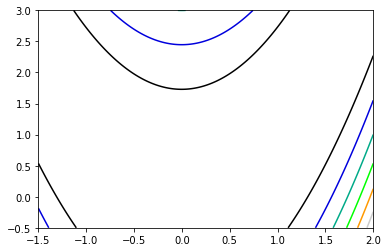

In [ ]:
cs = plt.contour(X, Y, Z, cmap=cm.nipy_spectral, extend='both', antialiased=True)
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

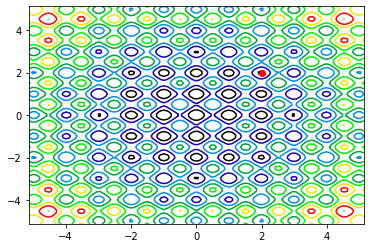

In [ ]:
cs = plt.contour(X, Y, Z, cmap=cm.nipy_spectral, extend='both', antialiased=True)
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
plt.plot(2, 2, 'ro')
cs.changed()
#plt.savefig('/content/rastrigin/rastrigin_contour.png')

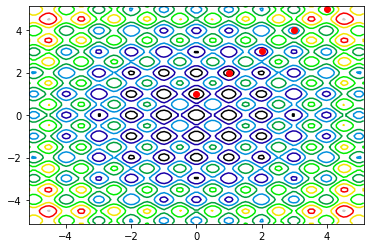

In [ ]:
cn = plt.contour(X, Y, Z, cmap=cm.nipy_spectral, extend='both', antialiased=True)
for i in range (0, 5):
  cs = cn
  cs.cmap.set_over('red')
  cs.cmap.set_under('blue')
  plt.plot(i, i + 1, 'ro')
  cs.changed()

In [ ]:
from scipy import stats
import numpy as np
import math
from scipy.stats import t
np.random.seed(12345678)

In [ ]:
#rastrigin 10
mean_star = [18.5062, 27.8801, 16.9214, 17.0137, 13.8370]
mean_ring = [84.9603, 78.7840, 78.3215, 69.9730, 65.2485]
std_star = [10.8006, 12.6648, 7.6433, 9.5583, 9.1208]
std_ring = [7.2767, 8.5577, 6.6691, 7.3057, 6.9980]
n = 10
df = 2*n - 2
for i in range(5):
  se_star, se_ring = std_star[i]/math.sqrt(n), std_ring[i]/math.sqrt(n)
  sed = math.sqrt(se_star**2.0 + se_ring**2.0)
  t_stat = (mean_star[i] - mean_ring[i]) / sed
  p = (1 - t.cdf(abs(t_stat), df)) * 2
  print(p)

3.775646462145232e-12
4.002597142616082e-09
2.0516921495072893e-13
4.4670711574212874e-11
3.439559748130705e-11


In [ ]:
#rosenbrock 10
mean_star = [111.7779, 219.1418, 1012.6834, 1.3412, 14.8872]
mean_ring = [48842.9305, 32936.2315, 30817.3520, 14851.3928, 13325.4102]
std_star = [296.1247, 389.2147, 2996.7106, 2.9453, 33.6231]
std_ring = [30191.9367, 15068.2192, 10282.7935, 9928.1873, 6906.4434]
n = 10
df = 2*n - 2
for i in range(5):
  se_star, se_ring = std_star[i]/math.sqrt(n), std_ring[i]/math.sqrt(n)
  sed = math.sqrt(se_star**2.0 + se_ring**2.0)
  t_stat = (mean_star[i] - mean_ring[i]) / sed
  p = (1 - t.cdf(abs(t_stat), df)) * 2
  print(p)

7.419882229298125e-05
2.0185827402929846e-06
6.14851576319353e-08
0.00016711670578062332
9.292941555605339e-06
